In [2]:

from utils.lfp_utils import *
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [4]:

# MAIN #
# PARAMETERS
task = 'fast-learning'  # 'context' or 'fast-learning'
trial_types = ['no_stim_trial', 'whisker_trial', 'auditory_trial']

# DATA FOLDER
#data_folder = Path('/Volumes/z_LSENS/Share/Toni_Nigro/ripple_tables')
data_folder = Path('/Users/toninigro/Desktop/LABO/ripple_tables')

save_path = Path("/Volumes/z_LSENS/Share/Toni_Nigro/ripple_results")

In [5]:
names = os.listdir(data_folder)
files = [os.path.join(data_folder, name) for name in names]

for file_id, file in enumerate(files):
        print(' ')
        print(f'Mouse: {names[file_id][0:5]}')
        file_path = os.path.join(data_folder, file)
        df = pd.read_pickle(file_path)

 
Mouse: AB147


In [83]:
df 

,trial_id,start_time,trial_type,lick_flag,lick_time,context,trial_duration,ripples_per_trial,ripple_times,ca1_lfp,...,is_whisking,ca1_spike_times,secondary_spike_times,whisker_trace,whisker_speed,tongue_trace,dlc_trial_ts,mouse,session,rewarded_group
id,,,,,,,,,,,,,,,,,,,,,
0,0,55.139748,whisker_trial,0,NaN,passive,2.831932,0,[],"[[1, 11, 9, 13, 36, 0, 33, 35, 31, 10, 52, 13,...",...,[],"[[], [56.64106675940715], [54.334514264938974,...","[[54.35261799342144, 54.369917734652205, 54.67...","[72.02293836375468, 71.74690293056452, 72.4397...","[0.0, 0.27603543319015955, 0.6928859943404433,...","[2.71189095397192, 2.7040733331860296, 2.69576...","[55.241747, 55.246747, 55.251747, 55.256747, 5...",AB147,AB147_20241212_151234,R+
1,1,58.171680,auditory_trial,0,NaN,passive,2.828085,0,[],"[[29, 39, 34, 33, 57, 15, 32, 35, 24, 0, 53, 6...",...,[],"[[], [], [57.25775405817526, 57.28802010148543...","[[57.83700954027388, 58.35776841743802, 58.452...","[107.50760943761165, 105.59377300561223, 103.8...","[0.0, 1.913836431999414, 1.6992974413925879, 1...","[15.473710636855614, 15.424974186443201, 15.41...","[58.271679, 58.276679, 58.281678, 58.286678, 5...",AB147,AB147_20241212_151234,R+
2,2,61.199765,whisker_trial,0,NaN,passive,2.836810,0,[],"[[19, 36, 17, 10, 21, -20, -7, -5, -30, -58, -...",...,[],"[[], [], [60.48308762951735, 60.96521103308375...","[[60.21752859899698, 60.30682726326906, 60.661...","[75.7703345439816, 74.29653709876139, 72.77792...","[0.0, 1.4737974452202138, 1.5186097849005193, ...","[6.403949429870802, 2.7774957842079466, 2.7727...","[61.301684, 61.306683, 61.311683, 61.316683, 6...",AB147,AB147_20241212_151234,R+
3,3,64.236575,whisker_trial,0,NaN,passive,2.855164,0,[],"[[-5, 1, -3, -6, 10, -36, -7, -9, -4, -45, 3, ...",...,[],"[[], [], [63.2467640424389, 63.31219602814139,...","[[63.8944849321502, 65.85191131950134, 65.9653...","[75.65799934496225, 73.81914409489566, 73.9646...","[0.0, 1.8388552500665867, 0.1455470242805461, ...","[14.576525425595749, 16.00931321304999, 17.559...","[64.336614, 64.341614, 64.346614, 64.351614, 6...",AB147,AB147_20241212_151234,R+
4,4,67.291739,auditory_trial,0,NaN,passive,2.874565,0,[],"[[90, 91, 92, 87, 108, 72, 84, 84, 70, 46, 72,...",...,[],"[[], [], [66.31580083285435, 66.86142292860784...","[[66.29427136935381, 66.75645812304263, 66.768...","[89.54941173817171, 90.24294813182635, 90.3014...","[0.0, 0.6935363936546395, 0.05848179204646442,...","[14.577639747832645, 14.603309066633111, 14.61...","[67.391578, 67.396578, 67.401578, 67.406578, 6...",AB147,AB147_20241212_151234,R+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,3435.037269,auditory_trial,0,NaN,passive,2.870324,0,[],"[[47, 51, 35, 31, 47, 5, 25, 24, 11, -14, 22, ...",...,[],"[[], [], [], [], [3434.081738651714, 3434.1228...","[[], [], [], [], [], [], [], [], [], [], [3435...","[101.19592140634192, 104.99062042803578, 108.4...","[0.0, 3.7946990216938588, 3.4643807985565616, ...","[14.469318449890396, 14.869802218205738, 15.21...","[3435.139507, 3435.144507, 3435.149507, 3435.1...",AB147,AB147_20241212_151234,R+
379,379,3438.107593,auditory_trial,0,NaN,passive,2.853731,0,[],"[[36, 44, 46, 46, 65, 24, 45, 47, 37, 11, 42, ...",...,[],"[[], [], [], [], [3437.1272759261233, 3437.187...","[[], [], [], [], [], [], [], [], [], [], [3437...","[83.54397241867889, 86.85449802694257, 87.5158...","[0.0, 3.3105256082636743, 0.661307089533608, 1...","[2.5154768259955955, 2.516545275185824, 2.5182...","[3438.209472, 3438.214472, 3438.219472, 3438.2...",AB147,AB147_20241212_151234,R+
380,380,3441.161324,whisker_trial,0,NaN,passive,2.841845,0,[],"[[-35, -18, -19, -20, 4, -29, 1, 4, 0, -27, 21...",...,[],"[[], [], [], [], [3440.171246566132, 3440.3915...","[[], [], [], [3443.9355368930337], [], [3442.6...","[79.02563286406023, 79.44950129171593, 79.5597...","[0.0, 0.4238684276557052, 0.11024523769570749,...","[2.569482156983344, 2.5695188672091764, 2.5686...","[3441.259403, 3441.264403, 3441.2

In [7]:
df['trial_type'].value_counts()

trial_type
whisker_trial     188
auditory_trial     98
no_stim_trial      97
Name: count, dtype: int64

# LDA decoding on SS (somato sensory cortex)

In [8]:
vectors_whisker_C1= df[df['trial_type'] == 'whisker_trial'][['secondary_spike_times']]
vectors_auditory_C1= df[df['trial_type'] == 'auditory_trial'][['secondary_spike_times']]

In [9]:
whisker = df[df['trial_type'] == 'whisker_trial']['secondary_spike_times'] \
            .apply(lambda x: [len(sub) for sub in x])


In [10]:
vectors_whisker_C1

,secondary_spike_times
id,
0,"[[54.35261799342144, 54.369917734652205, 54.67..."
2,"[[60.21752859899698, 60.30682726326906, 60.661..."
3,"[[63.8944849321502, 65.85191131950134, 65.9653..."
5,"[[70.00082659408787, 70.01139310270088, 70.559..."
6,"[[73.9322781204913, 75.11422210758488, 75.2951..."
...,...
373,"[[], [], [], [], [3419.131082251596], [], [], ..."
374,"[[], [], [], [3422.7855055884647, 3424.9190950..."
377,"[[], [], [], [], [], [], [], [], [], [3431.960..."


In [11]:
vectors_auditory_C1=vectors_auditory_C1['secondary_spike_times'].apply(lambda x: [len(sub) for sub in x])
vectors_whisker_C1=vectors_whisker_C1['secondary_spike_times'].apply(lambda x: [len(sub) for sub in x])



# Prepare the array for the LDA 

In [41]:
window_sensory = 0.05
new_df = build_table_population_vectors(df, window_sensory=window_sensory, window_ripple=0.05, substract_baseline=True)

df_active = new_df[new_df.context == "active"]

In [85]:
df_active

,mouse,session,start_time,trial_type,lick_flag,context,ripples_per_trial,rewarded_group,ca1_ripple_content,second_ripple_content,ca1_sensory,second_sensory
id,,,,,,,,,,,,
71,AB147,AB147_20241212_151234,296.053159,auditory_trial,1,active,0,R+,[],[],"[0, 0, 0, 0, -2, 0, 1, 1, 1, 0, 0, 0, 0, -1]","[-1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0,..."
72,AB147,AB147_20241212_151234,305.323577,no_stim_trial,0,active,0,R+,[],[],"[0, 0, 1, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, -1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
73,AB147,AB147_20241212_151234,313.952323,no_stim_trial,0,active,0,R+,[],[],"[0, 0, 1, -1, 0, 0, 0, -1, -1, 0, 0, 2, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 1, -2, 0, 0, 0, 0, 0,..."
74,AB147,AB147_20241212_151234,322.454846,auditory_trial,1,active,0,R+,[],[],"[0, 0, 0, 0, -1, 0, 1, 0, 1, 0, 0, 0, 0, 0]","[-1, 0, 0, 0, -1, 0, 0, 1, -1, 0, -1, -1, 1, 0..."
75,AB147,AB147_20241212_151234,331.498227,auditory_trial,1,active,0,R+,[],[],"[0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, -1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
307,AB147,AB147_20241212_151234,3170.922120,no_stim_trial,0,active,1,R+,"[[0, 0, 0, 0, -2, 0, 0, 0, 5, 0, 0, 1, 1, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
308,AB147,AB147_20241212_151234,3180.396977,no_stim_trial,0,active,1,R+,"[[0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0]]","[[0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, -2, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0,..."
309,AB147,AB147_20241212_151234,3189.434717,no_stim_trial,0,active,0,R+,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


In [ ]:
# let's prepare the vectors measure from the SSp-bfd area for the LDA
df_active['s_sensory']
X= np.stack(df_active['ca1_sensory'].values)
X

ValueError: all input arrays must have the same shape

In [47]:
# as we are doing a LDA on the SS we need to make projection of the second ripple content on the same axe to see if we can discriminate 
# the trial type with the ripple content
df_active.head()
ripple_vectors = []
ripple_labels = []

# we loop through the active trials and extract the ripple vectors and their corresponding labels (trial type)
for _, row in df_active.iterrows():
    for ripple_vec in row['second_ripple_content']:
        ripple_vectors.append(ripple_vec)
        ripple_labels.append(row['trial_type'])   # ou lick_flag, etc.

X = np.stack(ripple_vectors)
y= np.array(ripple_labels)

# Make the label 

In [31]:

y= df_active['trial_type'].values
len(y)

241

In [48]:
# let's fit the LDA model on our data X with labels y (whisker, auditory, no_stim)
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
LinearDiscriminantAnalysis()


,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


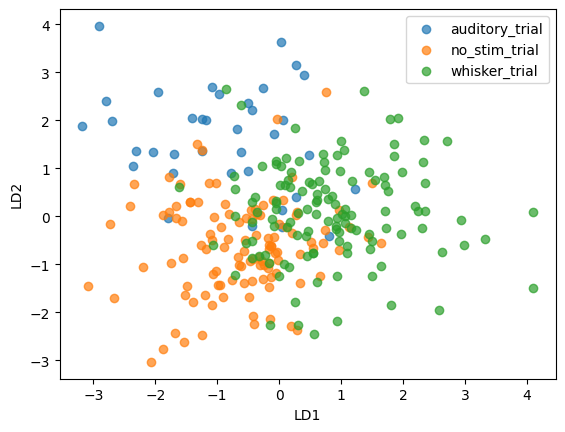

In [49]:
#Let's make a graph to check the discrimnation when we do the projetction on the axe
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda = clf.fit_transform(X, y)

plt.figure()
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0],
                X_lda[y == label, 1],
                label=label,
                alpha=0.7)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

In [152]:
# as we are doing a LDA on the SS we need to make projection of the second ripple content on the same axe to see if we can discriminate 
# the trial type with the ripple content
df_active.head()
ripple_vectors = []
ripple_labels = []

# we loop through the active trials and extract the ripple vectors and their corresponding labels (trial type)
for _, row in df_active.iterrows():
    for ripple_vec in row['ca1_ripple_content']:
        ripple_vectors.append(ripple_vec)
        ripple_labels.append(row['trial_type'])   # ou lick_flag, etc.

X_ripples = np.stack(ripple_vectors)
y_ripples= np.array(ripple_labels)

In [153]:
# let's project the ripple vectors on the LDA axes we computed with the sensory vectors
X_ripples_lda = clf.transform(X_ripples)

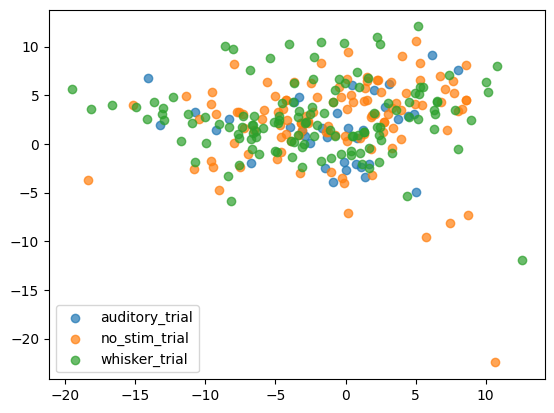

In [154]:
# plot the projected ripple vectors 
plt.figure()
for label in np.unique(y_ripples):
    plt.scatter(X_ripples_lda[y_ripples == label, 0],
                X_ripples_lda[y_ripples == label, 1],
                label=label,
                alpha=0.7)
plt.legend()    

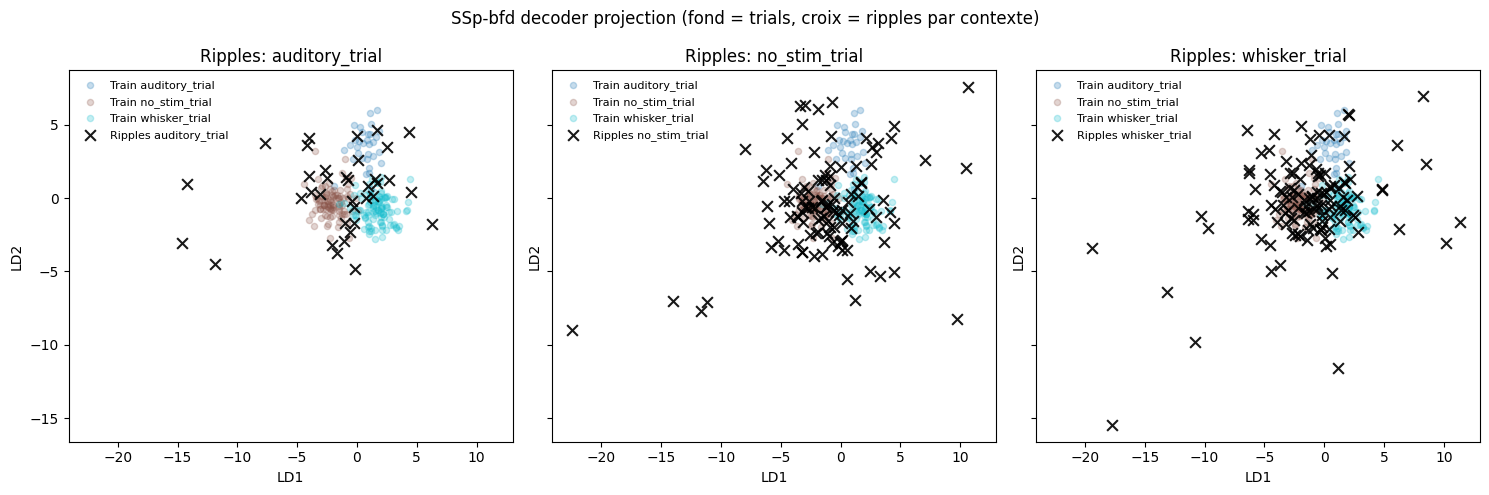

In [138]:
# Labels (on force le même ordre entre train et ripples)
labels = np.unique(y)  # suppose que y contient les 3 contextes
colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))
color_map = {lab: col for lab, col in zip(labels, colors)}

fig, axes = plt.subplots(1, len(labels), figsize=(5 * len(labels), 5), sharex=True, sharey=True)

# Si jamais axes n'est pas une liste (cas 1 seul label)
if len(labels) == 1:
    axes = [axes]

for ax, focus_label in zip(axes, labels):

    # ----- Fond: tous les trials, colorés par contexte -----
    for lab in labels:
        ax.scatter(
            X_lda[y == lab, 0],
            X_lda[y == lab, 1],
            alpha=0.25,
            s=20,
            color=color_map[lab],
            label=f"Train {lab}"
        )

    # ----- Overlay: ripples du contexte focus en croix noires -----
    mask_r = (y_ripples == focus_label)
    ax.scatter(
        X_ripples_lda[mask_r, 0],
        X_ripples_lda[mask_r, 1],
        marker='x',
        s=60,
        alpha=0.9,
        color='black',
        label=f"Ripples {focus_label}"
    )

    ax.set_title(f"Ripples: {focus_label}")
    ax.set_xlabel("LD1")
    ax.set_ylabel("LD2")

    # Légende simple (optionnel : tu peux la retirer si ça encombre)
    ax.legend(frameon=False, fontsize=8)

plt.suptitle("SSp-bfd decoder projection (fond = trials, croix = ripples par contexte)")
plt.tight_layout()
plt.show()

In [139]:
# let's estimate the predict proba of the ripple vectors to belong to each trial type class
proba_ripples = clf.predict_proba(X_ripples)
proba_ripples_df = pd.DataFrame(proba_ripples, columns=clf.classes_)
proba_ripples_df['true_label'] = y_ripples
proba_ripples_df.head() 

,auditory_trial,no_stim_trial,whisker_trial,true_label
0,0.000023,9.999038e-01,7.292933e-05,no_stim_trial
1,0.999997,2.902936e-06,4.503572e-10,no_stim_trial
2,0.370402,6.295976e-01,8.036394e-08,auditory_trial
3,0.037260,1.281557e-03,9.614584e-01,auditory_trial
4,0.998041,2.353103e-07,1.958772e-03,no_stim_trial


In [145]:
# for each label,let's compute the mean proba of its predicted class
mean_table=proba_ripples_df.groupby(['true_label']).agg('mean').reset_index()
mean_table.head()

,true_label,auditory_trial,no_stim_trial,whisker_trial
0,auditory_trial,0.161192,0.534855,0.303953
1,no_stim_trial,0.152472,0.552072,0.295455
2,whisker_trial,0.115972,0.564936,0.319092


In [144]:
# let's peform a statistic test to see if the mean between no stim trial and whisker trail is statitstically significant. 
# 2 catagories + same participants + does the data meet the assumptions ?

# let's check the assumptions 
proba_ripples_df.groupby(['true_label']).count()


,auditory_trial,no_stim_trial,whisker_trial
true_label,,,
auditory_trial,36,36,36
no_stim_trial,114,114,114
whisker_trial,125,125,125


In [ ]:
import scipy as sp 
# compute p-value from t-test 

probaw_whisker_trial = proba_ripples_df[proba_ripples_df['true_label'] == 'whisker_trial']['whisker_trial']
probaw_no_stim_trial = proba_ripples_df[proba_ripples_df['true_label'] == 'no_stim_trial']['whisker_trial']

# Perform Welch's t-test
t_stat, p_value = sp.stats.ttest_ind(
    probaw_whisker_trial,
    probaw_no_stim_trial,
    equal_var=False,  # This performs Welch's t-test because we cannot assume that the groups have equal variance 
    nan_policy='omit'
)

print(f"Welch's t-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")


# Interpretation
# we assume there the variable p_value from the t-test is defined above
alpha = 0.05
if p_value < alpha:
    print(f"\nThe p-value is less than {alpha}, so we reject the null hypothesis.")
    print("There is a statistically significant difference in grades between take-home and in-person exams.")
else:
    print(f"\nThe p-value is greater than {alpha}, so we fail to reject the null hypothesis.")

Welch's t-test results:
T-statistic: 0.4306
P-value: 0.6671492434969748

The p-value is greater than 0.05, so we fail to reject the null hypothesis.


In [ ]:
# Let's make a function pipeline to do all the steps for the LDA, for the differnet bain regions

def lda_pipeline(df,brain_region, window_sensory=0.05, window_ripple=0.05, substract_baseline=True):
    new_df = build_table_population_vectors(df, window_sensory=window_sensory, window_ripple=window_ripple, substract_baseline=substract_baseline)
    df_active = new_df[new_df.context == "active"]
    sensory_region = f'{brain_region}_sensory'
    ripple_content_region = f'{brain_region}_ripple_content'
    
    # Prepare sensory vectors for LDA
    X_sensory = np.stack(df_active[sensory_region].values)
    y_sensory = df_active['trial_type'].values

     # Prepare ripple vectors
    ripple_vectors = []
    ripple_labels = []
    
    for _, row in df_active.iterrows():
        for ripple_vec in row[ripple_content_region]:
            ripple_vectors.append(ripple_vec)
            ripple_labels.append(row['trial_type'])
    
    X_ripples = np.stack(ripple_vectors)
    y_ripples = np.array(ripple_labels)
    
    # Fit LDA model for sensory data
    clf = LinearDiscriminantAnalysis()

    # Project sensory vectors on LDA axes
    X_sensory_lda = clf.fit_transform(X_sensory, y_sensory)

    # Project ripple vectors on LDA axes from senory data
    X_ripples_sensory_lda = clf.transform(X_ripples)

    #Fit new LDA model on the ripple data to see if we can discriminate the trial type with the ripple content
    clf_ripples = LinearDiscriminantAnalysis()
    X_ripples_lda = clf_ripples.fit_transform(X_ripples, y_ripples)

    
    return X_sensory_lda, y_sensory, X_ripples_sensory_lda,X_ripples_lda, y_ripples

In [ ]:
trial_Table

In [ ]:
#let's make the results for the different brain regions and with or without baseline substraction
array_X=[]
labels_y=[]
results = {}    
brain_regions = ['ca1', 'second']
for region in brain_regions:
    for baseline in [False, True]:
        key = (region, baseline)
        X_sensory_lda, y_sensory, X_ripples_sensory_lda, X_ripples_lda, y_ripples = lda_pipeline(df,region, window_sensory=0.05, window_ripple=0.05, substract_baseline=baseline)
        array_X.extend([X_sensory_lda, X_ripples_sensory_lda, X_ripples_lda])
        labels_y.extend([y_sensory, y_ripples, y_ripples])  # y_ripples is repeated to match the number of X arrays
        results[key] = {
            "sensory": (X_sensory_lda, y_sensory),
            "ripple_proj": (X_ripples_sensory_lda, y_ripples),
            "ripple_lda": (X_ripples_lda, y_ripples),
            }

In [82]:
print(results[('ca1',True)]['sensory'][1]) 
      

['auditory_trial' 'no_stim_trial' 'no_stim_trial' 'auditory_trial'
 'auditory_trial' 'no_stim_trial' 'auditory_trial' 'auditory_trial'
 'auditory_trial' 'no_stim_trial' 'auditory_trial' 'no_stim_trial'
 'no_stim_trial' 'auditory_trial' 'no_stim_trial' 'auditory_trial'
 'auditory_trial' 'no_stim_trial' 'no_stim_trial' 'whisker_trial'
 'whisker_trial' 'auditory_trial' 'whisker_trial' 'no_stim_trial'
 'whisker_trial' 'no_stim_trial' 'whisker_trial' 'no_stim_trial'
 'whisker_trial' 'whisker_trial' 'whisker_trial' 'no_stim_trial'
 'no_stim_trial' 'no_stim_trial' 'whisker_trial' 'whisker_trial'
 'no_stim_trial' 'auditory_trial' 'no_stim_trial' 'whisker_trial'
 'auditory_trial' 'no_stim_trial' 'no_stim_trial' 'no_stim_trial'
 'whisker_trial' 'whisker_trial' 'whisker_trial' 'whisker_trial'
 'whisker_trial' 'no_stim_trial' 'no_stim_trial' 'whisker_trial'
 'no_stim_trial' 'whisker_trial' 'auditory_trial' 'whisker_trial'
 'no_stim_trial' 'no_stim_trial' 'whisker_trial' 'no_stim_trial'
 'whisker_t

In [73]:
import numpy as np
import matplotlib.pyplot as plt

color_dict = {
    "auditory_trial": "orange",
    "whisker_trial": "green",
    "no_stim_trial": "blue"
}

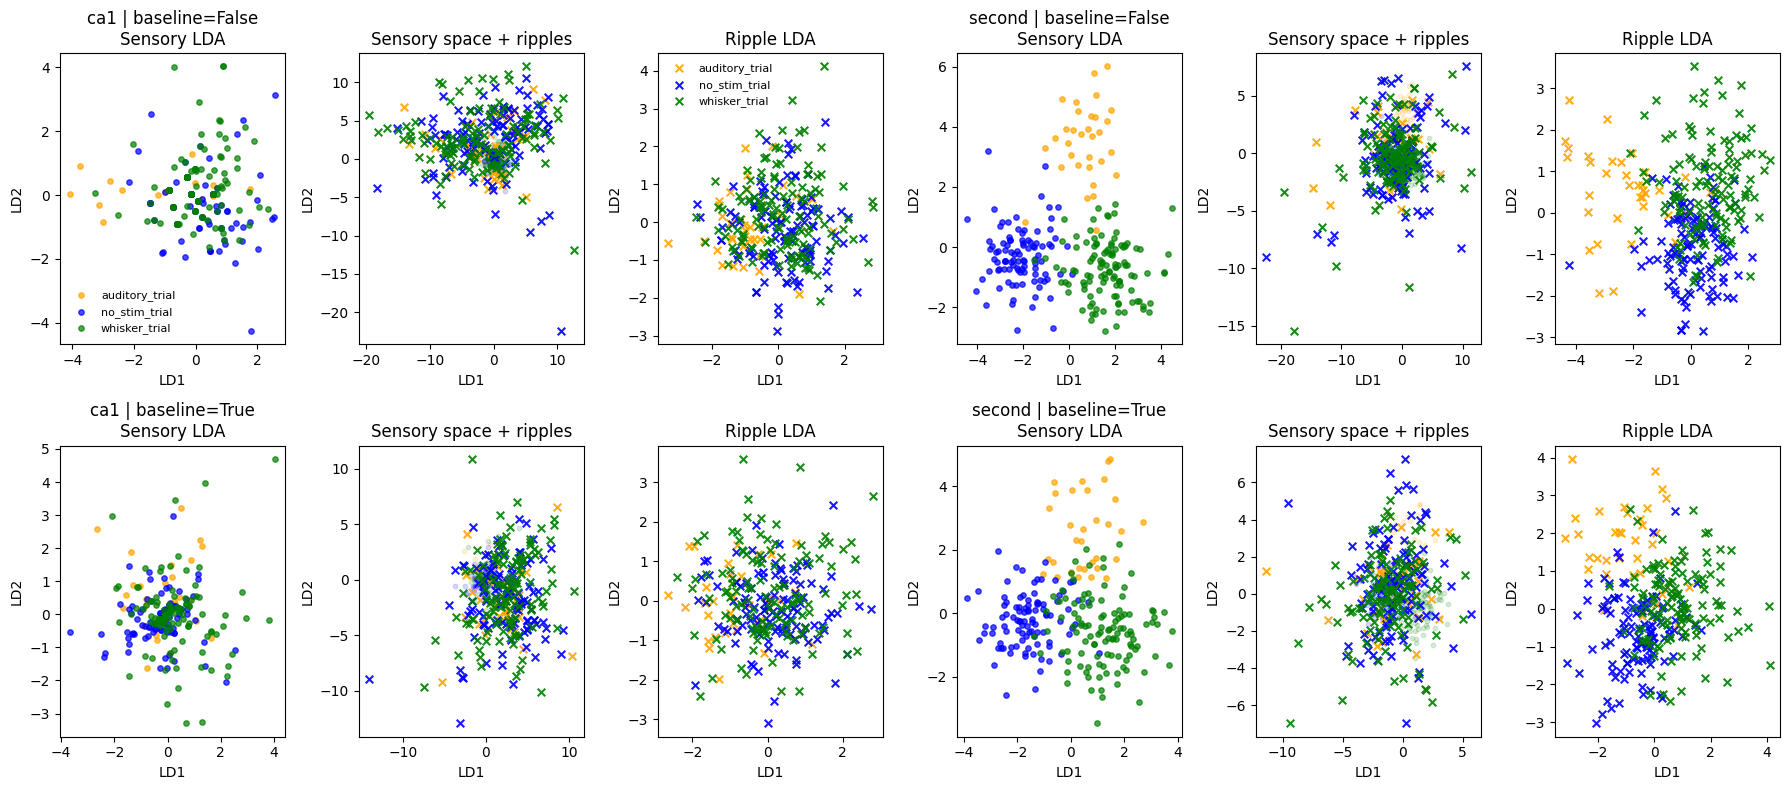

In [74]:
def plot_2x2x3(results, brain_regions=('ca1', 'second'), baselines=(False, True)):
    fig, axes = plt.subplots(
        nrows=len(baselines),
        ncols=len(brain_regions) * 3,
        figsize=(18, 8),
        sharex=False,
        sharey=False
    )

    for r, baseline in enumerate(baselines):
        for c, region in enumerate(brain_regions):

            key = (region, baseline)
            if key not in results:
                continue

            X_sens, y_sens = results[key]["sensory"]
            X_rproj, y_rip = results[key]["ripple_proj"]
            X_rlda, _ = results[key]["ripple_lda"]

            # ---------- PANEL 1 : Sensory ----------
            ax1 = axes[r, c*3 + 0]
            for lab in np.unique(y_sens):
                ax1.scatter(
                    X_sens[y_sens == lab, 0],
                    X_sens[y_sens == lab, 1],
                    color=color_dict.get(lab, "gray"),
                    alpha=0.7,
                    s=15,
                    label=str(lab)
                )
            ax1.set_title(f"{region} | baseline={baseline}\nSensory LDA")
            ax1.set_xlabel("LD1")
            ax1.set_ylabel("LD2")

            if r == 0 and c == 0:
                ax1.legend(fontsize=8, frameon=False)

            # ---------- PANEL 2 : Sensory fond + ripples ----------
            ax2 = axes[r, c*3 + 1]

            # sensory en fond transparent
            for lab in np.unique(y_sens):
                ax2.scatter(
                    X_sens[y_sens == lab, 0],
                    X_sens[y_sens == lab, 1],
                    color=color_dict.get(lab, "gray"),
                    alpha=0.15,
                    s=10
                )

            # ripples en croix avec même couleur
            if X_rproj is not None:
                for lab in np.unique(y_rip):
                    ax2.scatter(
                        X_rproj[y_rip == lab, 0],
                        X_rproj[y_rip == lab, 1],
                        marker='x',
                        color=color_dict.get(lab, "gray"),
                        s=30,
                        alpha=0.9
                    )

            ax2.set_title("Sensory space + ripples")
            ax2.set_xlabel("LD1")
            ax2.set_ylabel("LD2")

            # ---------- PANEL 3 : Ripple LDA ----------
            ax3 = axes[r, c*3 + 2]

            if X_rlda is not None:
                for lab in np.unique(y_rip):
                    ax3.scatter(
                        X_rlda[y_rip == lab, 0],
                        X_rlda[y_rip == lab, 1],
                        marker='x',
                        color=color_dict.get(lab, "gray"),
                        s=30,
                        alpha=0.9,
                        label=str(lab)
                    )

            ax3.set_title("Ripple LDA")
            ax3.set_xlabel("LD1")
            ax3.set_ylabel("LD2")

            if r == 0 and c == 0:
                ax3.legend(fontsize=8, frameon=False)

    plt.tight_layout()
    plt.show()

# Usage
plot_2x2x3(results, brain_regions=['ca1','second'], baselines=[False, True])
        

